In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet.utilities import regressor_coefficients

import pickle


/Users/saraborello/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('df_inno_elbo.csv', sep=',')
df = df.fillna(0)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

<Axes: xlabel='Date'>

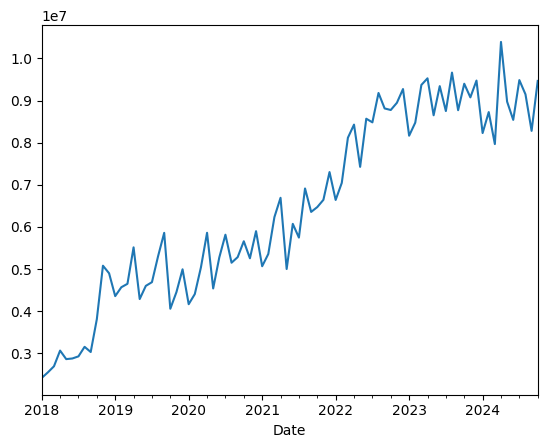

In [5]:
df.set_index('Date')['Ex-factory volumes'].plot()

**Why Remove Collinearity in Time Series Forecasting?**  

- **Improves model stability**: Prevents unstable or unreliable coefficients.  
- **Enhances prediction accuracy**: Reduces overfitting and improves generalization.  
- **Increases interpretability**: Clarifies the impact of each regressor.  
- **Avoids redundancy**: Removes unnecessary or duplicate information.  
- **Boosts efficiency**: Simplifies the model and reduces computational complexity.  

In [6]:
df.columns

Index(['Date', 'INNOVIX_Indication 10_Email',
       'INNOVIX_Indication 10_Face to face call',
       'INNOVIX_Indication 10_Meeting', 'INNOVIX_Indication 12_Email',
       'INNOVIX_Indication 12_Face to face call',
       'INNOVIX_Indication 12_Meeting', 'INNOVIX_Indication 14_Email',
       'INNOVIX_Indication 14_Face to face call',
       'INNOVIX_Indication 14_Meeting', 'INNOVIX_Indication 19_Email',
       'INNOVIX_Indication 19_Face to face call',
       'INNOVIX_Indication 19_Meeting', 'INNOVIX_Indication 1_Email',
       'INNOVIX_Indication 1_Face to face call',
       'INNOVIX_Indication 1_Meeting', 'INNOVIX_Indication 20_Email',
       'INNOVIX_Indication 20_Face to face call',
       'INNOVIX_Indication 20_Meeting', 'INNOVIX_Indication 23_Email',
       'INNOVIX_Indication 23_Face to face call',
       'INNOVIX_Indication 23_Meeting', 'INNOVIX_Indication 25_Email',
       'INNOVIX_Indication 25_Face to face call',
       'INNOVIX_Indication 25_Meeting', 'INNOVIX_Indication 

In [12]:
regressors = [col for col in df.columns if col not in ['Date', 'Ex-factory volumes']]

Original Regressors: 97
Filtered Regressors: 21
Deleted Regressors: {'YREX_Indication 20_Email', 'YREX_Indication 20_Face to face call', 'YREX_Indication 14_Face to face call', 'INNOVIX_Indication 18', 'YREX_Indication 1_Email', 'INNOVIX_Indication 2', 'YREX_Indication 23_Meeting', 'INNOVIX_Indication 25_Face to face call', 'YREX_Indication 19_Email', 'YREX_Indication 5_Email', 'YREX_Indication 10_Meeting', 'INNOVIX_Indication 1_Meeting', 'INNOVIX_Indication 12_Meeting', 'INNOVIX_Indication 14_Face to face call', 'INNOVIX_Indication 12_Face to face call', 'INNOVIX_Indication 9_Meeting', 'INNOVIX_Indication 7', 'YREX_Indication 7_Email', 'INNOVIX_Indication 19_Email', 'INNOVIX_Indication 19', 'YREX_Indication 5_Face to face call', 'INNOVIX_Indication 1_Face to face call', 'INNOVIX_Indication 23_Meeting', 'INNOVIX_Indication 19_Meeting', 'YREX_Indication 23_Face to face call', 'YREX_Indication 4_Meeting', 'YREX_Indication 9_Meeting', 'YREX_Indication 9_Face to face call', 'YREX_Indicatio

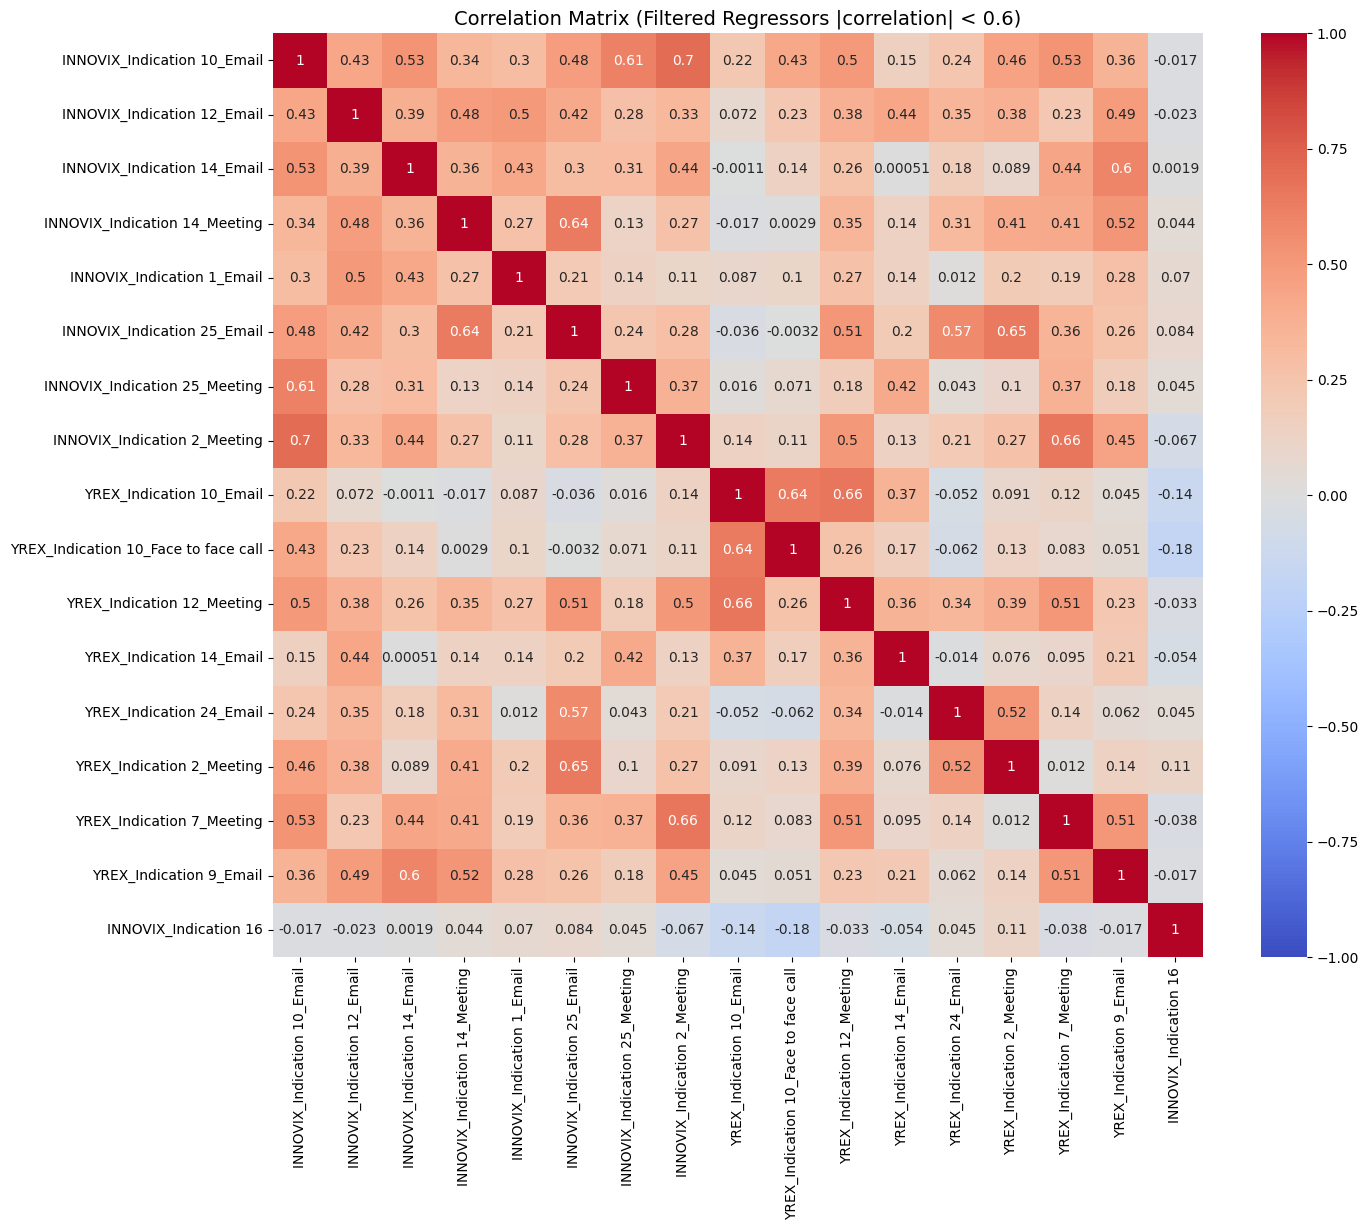

In [13]:
corr_matrix = df[regressors].corr()

correlated_features = set()
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)


regressors_filtered = [col for col in regressors if col not in correlated_features]

print(f"Original Regressors: {len(regressors)}")
print(f"Filtered Regressors: {len(regressors_filtered)}")
print(f"Deleted Regressors: {correlated_features}")


filtered_corr = df[regressors_filtered].corr()
filtered_corr = filtered_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)


plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix (Filtered Regressors |correlation| < 0.6)', fontsize=14)
plt.show()

In [9]:
correlated_features = set() 
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  
            correlated_features.add(colname)

regressors_filtered = [col for col in regressors if col not in correlated_features]


print(f"Original Regressor: {len(regressors)}")
print(f"Frlitered Regressor: {len(regressors_filtered)}")
print(f"Delated Regressor: {correlated_features}")
df_filtered = df[regressors_filtered]

Original Regressor: 98
Frlitered Regressor: 22
Delated Regressor: {'YREX_Indication 20_Email', 'YREX_Indication 20_Face to face call', 'YREX_Indication 14_Face to face call', 'INNOVIX_Indication 18', 'YREX_Indication 1_Email', 'INNOVIX_Indication 2', 'YREX_Indication 23_Meeting', 'INNOVIX_Indication 25_Face to face call', 'YREX_Indication 19_Email', 'YREX_Indication 5_Email', 'YREX_Indication 10_Meeting', 'INNOVIX_Indication 1_Meeting', 'INNOVIX_Indication 12_Meeting', 'INNOVIX_Indication 14_Face to face call', 'INNOVIX_Indication 12_Face to face call', 'INNOVIX_Indication 9_Meeting', 'INNOVIX_Indication 7', 'YREX_Indication 7_Email', 'INNOVIX_Indication 19_Email', 'INNOVIX_Indication 19', 'YREX_Indication 5_Face to face call', 'INNOVIX_Indication 1_Face to face call', 'INNOVIX_Indication 23_Meeting', 'INNOVIX_Indication 19_Meeting', 'YREX_Indication 23_Face to face call', 'YREX_Indication 4_Meeting', 'YREX_Indication 9_Meeting', 'YREX_Indication 9_Face to face call', 'YREX_Indication 

### COEFFICIENTS
- Positive Impact:
Regressors like **INNOVIX_Indication 25_Email**, **YREX_Indication 10_Email**, and **YREX_Indication 24_Email** contribute positively to the forecast. This means that as their values increase, the predicted outcome also increases.
These variables play a supportive role in boosting the target variable.

- Negative Impact:
Regressors such as **INNOVIX_Indication 14_Email**, **INNOVIX_Indication 14_Meeting**, and **YREX_Indication 14_Email** have a negative effect on the forecast. As their values rise, they decrease the forecasted outcome.
These variables might represent factors that detract from the target variable.

- Magnitude of Impact:
Regressors like **INNOVIX_Indication 16** have an extraordinarily large positive effect, indicating that even small changes in their values can significantly influence the forecast.
Conversely, some regressors, such as **INNOVIX_Indication 11**, have an extremely minimal impact, making their contribution negligible.

In [10]:
#Reload the model
with open('prophet_model.pkl', 'rb') as f:
    m = pickle.load(f)

coefficients = regressor_coefficients(m)
coefficients


,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,INNOVIX_Indication 10_Email,additive,3.923077,6.505690e+03,6.505690e+03,6.505690e+03
1,INNOVIX_Indication 10_Face to face call,additive,82.038462,-5.804437e+01,-5.804437e+01,-5.804437e+01
2,INNOVIX_Indication 10_Remote call,additive,22.261538,-9.165672e+02,-9.165672e+02,-9.165672e+02
3,INNOVIX_Indication 12_Email,additive,5.046154,2.960313e+02,2.960313e+02,2.960313e+02
4,INNOVIX_Indication 12_Face to face call,additive,107.284615,-4.108273e+02,-4.108273e+02,-4.108273e+02
5,INNOVIX_Indication 12_Meetings,additive,3.076923,2.387101e+04,2.387101e+04,2.387101e+04
6,INNOVIX_Indication 12_Remote call,additive,64.146154,7.945313e+02,7.945313e+02,7.945313e+02
7,INNOVIX_Indication 19_Email,additive,23.738462,4.182203e+02,4.182203e+02,4.182203e+02
8,INNOVIX_Indication 1_Remote call,additive,42.876923,-1.127142e+03,-1.127142e+03,-1.127142e+03
9,INNOVIX_Indication 12_Indication 12_New patien...,additive,0.203244,1.624931e+06,1.624931e+06,1.624931e+06
